# Zadanie 5

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]


In [1]:
import gymnasium
from gymnasium.core import Env
import numpy as np
import random
from matplotlib import pyplot as plt
from typing import Tuple

In [2]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
            self,
            observation_space: int,
            action_space: int,
            learning_rate: float = 0.1,
            gamma: float = 0.9,
            epsilon: float = 0.1,
    ):
        self._observation_space = observation_space
        self._action_space = action_space
        self._learning_rate = learning_rate
        self._gamma = gamma
        self._epsilon = epsilon

        self._q_table = np.zeros((self._observation_space, self._action_space))

    def __call__(self, state: np.ndarray, action: np.ndarray) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self._q_table[state, action]

    def update(self, state: np.ndarray, new_state, action: np.ndarray,
               reward: float) -> None:
        """Update Q-value of given state and action."""
        delta = reward + self._gamma * np.max(self._q_table[new_state]) - self._q_table[state, action]
        self._q_table[state, action] = self._q_table[state, action] + self._learning_rate * delta 

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""

        if random.uniform(0, 1) < self._epsilon:
            # Explore
            return np.random.randint(low=0, high=self._action_space)
        else:
            # Get best or exploit
            return np.argmax(self._q_table[state])

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        info = f"Q-Learning Solver\n"
        info += "="*20 + '\n'
        info += f"Learning rate: {self._learning_rate}"
        info += f"Gamma: {self._gamma}"
        info += f"Epsilon: {self._epsilon}"
        info += "="*20 + '\n'
        info += f"Observation space: {self._observation_space}"
        info += f"Action space: {self._action_space}"
        return info

    def __str__(self):
        return self.__repr__()

In [70]:
def train(environment: Env, epochs: int, steps_per_epoch: int,
          parameters: dict, verbose=0) -> Tuple['QLearningSolver', list, list]:

    solver = QLearningSolver(
                environment.observation_space.n, environment.action_space.n,
                learning_rate=parameters["learning_rate"],
                gamma=parameters["gamma"],
                epsilon=parameters["epsilon"]
            )

    rewards = []
    results = []
    successful_epochs = 0

    for epoch in range(1, epochs+1):
        if verbose == 1:
            print(f"Epoch: {epoch}/{epochs}")

        state = environment.reset()[0]

        epoch_accumulated_reward = 0
        done = False
        for step in range(steps_per_epoch):
            move = solver.get_best_action(state)
            next_state, reward, done, _, _ = environment.step(int(move))
            epoch_accumulated_reward += reward

            solver.update(state, next_state, move, float(reward))
            state = next_state
            if done:
                break

        if done:
            successful_epochs += 1
            if verbose == 1:
                print(f"Epoch {epoch} successful!")
        else:
            if verbose == 1:
                print(f"Epoch {epoch} unsuccessful!")
        rewards.append(epoch_accumulated_reward)
        results.append(done)

    if verbose == 1:
        print(f"Successful epochs: {successful_epochs}/{epochs}")

    return solver, rewards, results

In [121]:
def test_solver(environment: Env, solver: 'QLearningSolver', tests: int, tries_per_tests: int, verbose=0) -> Tuple[list, list, float]:
    rewards = []
    results = []
    successful_tests = 0

    for test in range(1, tests+1):
        if verbose == 1:
            print(f"Test: {test}/{tests}")

        state = environment.reset()[0]
        epoch_accumulated_reward = 0
        done = False
        for test_try in range(tries_per_tests):
            move = solver.get_best_action(state)
            next_state, reward, done, _, _ = environment.step(int(move))
            epoch_accumulated_reward += reward

            state = next_state
            if done:
                break

        if done:
            successful_tests += 1
            if verbose == 1:
                print(f"Test {test} successful!")
        else:
            if verbose == 1:
                print(f"Test {test} unsuccessful!")
        
        rewards.append(epoch_accumulated_reward)
        results.append(done)

    accuracy = successful_tests/tests
    if verbose == 1:
        print(f"Successful tests: {successful_tests}/{tests}")
        print(f"Accuracy: {accuracy:.2f}")
    return rewards, results, accuracy


# Eksperymenty
## Próba dla parametrów domyślnych - learning rate: 0.1, $\gamma$: 0.9, $\epsilon$: 0.1

In [84]:
train_epochs = 1000
parameters = {"learning_rate": 0.1, "gamma": 0.9, "epsilon": 0.1}
solver, train_rewards, train_results = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters, verbose=1)

Epoch: 1/1000
Epoch 1 unsuccessful!
Epoch: 2/1000
Epoch 2 unsuccessful!
Epoch: 3/1000
Epoch 3 unsuccessful!
Epoch: 4/1000
Epoch 4 unsuccessful!
Epoch: 5/1000
Epoch 5 unsuccessful!
Epoch: 6/1000
Epoch 6 unsuccessful!
Epoch: 7/1000
Epoch 7 unsuccessful!
Epoch: 8/1000
Epoch 8 unsuccessful!
Epoch: 9/1000
Epoch 9 unsuccessful!
Epoch: 10/1000
Epoch 10 unsuccessful!
Epoch: 11/1000
Epoch 11 unsuccessful!
Epoch: 12/1000
Epoch 12 unsuccessful!
Epoch: 13/1000
Epoch 13 unsuccessful!
Epoch: 14/1000
Epoch 14 unsuccessful!
Epoch: 15/1000
Epoch 15 unsuccessful!
Epoch: 16/1000
Epoch 16 unsuccessful!
Epoch: 17/1000
Epoch 17 unsuccessful!
Epoch: 18/1000
Epoch 18 unsuccessful!
Epoch: 19/1000
Epoch 19 unsuccessful!
Epoch: 20/1000
Epoch 20 unsuccessful!
Epoch: 21/1000
Epoch 21 unsuccessful!
Epoch: 22/1000
Epoch 22 unsuccessful!
Epoch: 23/1000
Epoch 23 unsuccessful!
Epoch: 24/1000
Epoch 24 unsuccessful!
Epoch: 25/1000
Epoch 25 unsuccessful!
Epoch: 26/1000
Epoch 26 unsuccessful!
Epoch: 27/1000
Epoch 27 unsucc

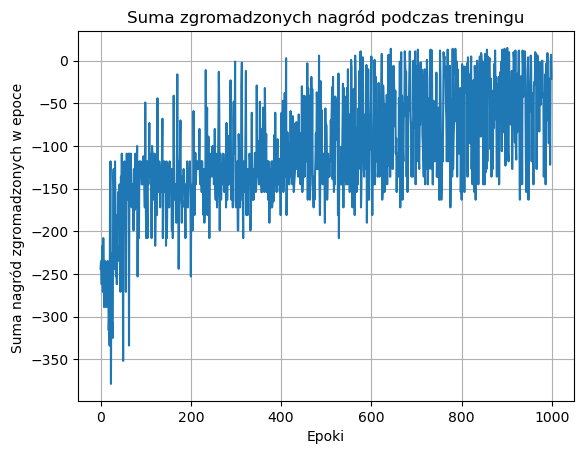

In [85]:
plt.plot([x for x in range(train_epochs)], train_rewards)
plt.xlabel("Epoki")
plt.ylabel("Suma nagród zgromadzonych w epoce ")
plt.title("Suma zgromadzonych nagród podczas treningu")
plt.grid()
plt.show()

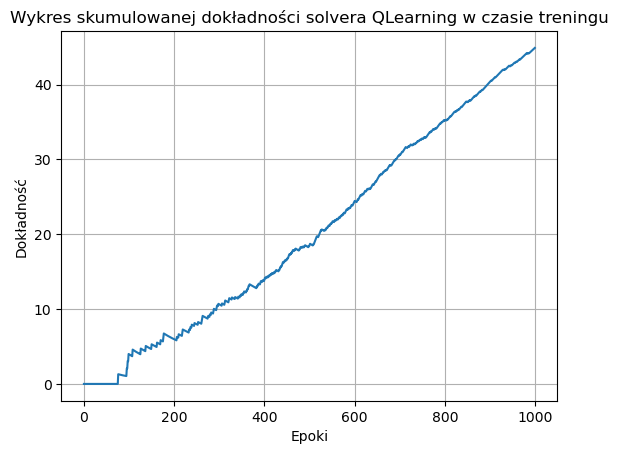

In [86]:
accumulated_accuracies = [len([train_results[x] for x in range(i) if train_results[x]])/i for i in range(1,train_epochs+1)]
accumulated_accuracies_percent = [100*x for x in accumulated_accuracies]
plt.plot([x for x in range(train_epochs)], accumulated_accuracies_percent)
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.title("Wykres skumulowanej dokładności solvera QLearning w czasie treningu")
plt.grid()
plt.show()

In [88]:
tests = 1000
rewards, results, accuracy = test_solver(gymnasium.make('Taxi-v3'), solver, tests, 100, verbose=1)

Test: 1/1000
Test 1 unsuccessful!
Test: 2/1000
Test 2 unsuccessful!
Test: 3/1000
Test 3 successful!
Test: 4/1000
Test 4 unsuccessful!
Test: 5/1000
Test 5 unsuccessful!
Test: 6/1000
Test 6 successful!
Test: 7/1000
Test 7 unsuccessful!
Test: 8/1000
Test 8 unsuccessful!
Test: 9/1000
Test 9 unsuccessful!
Test: 10/1000
Test 10 unsuccessful!
Test: 11/1000
Test 11 unsuccessful!
Test: 12/1000
Test 12 unsuccessful!
Test: 13/1000
Test 13 unsuccessful!
Test: 14/1000
Test 14 successful!
Test: 15/1000
Test 15 unsuccessful!
Test: 16/1000
Test 16 successful!
Test: 17/1000
Test 17 successful!
Test: 18/1000
Test 18 unsuccessful!
Test: 19/1000
Test 19 unsuccessful!
Test: 20/1000
Test 20 unsuccessful!
Test: 21/1000
Test 21 unsuccessful!
Test: 22/1000
Test 22 unsuccessful!
Test: 23/1000
Test 23 unsuccessful!
Test: 24/1000
Test 24 unsuccessful!
Test: 25/1000
Test 25 successful!
Test: 26/1000
Test 26 successful!
Test: 27/1000
Test 27 unsuccessful!
Test: 28/1000
Test 28 unsuccessful!
Test: 29/1000
Test 29 un

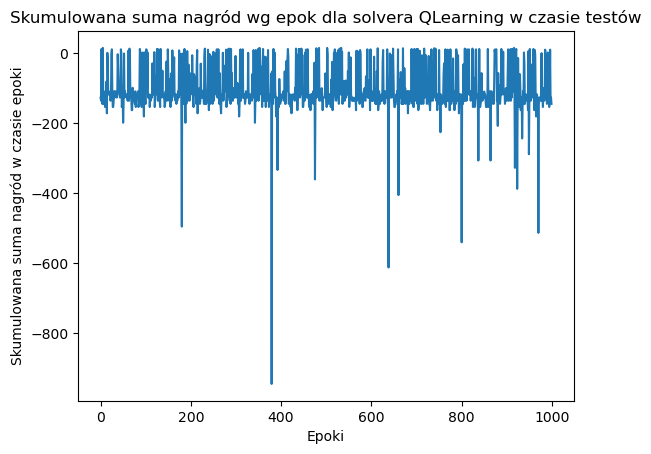

In [89]:
plt.plot([x for x in range(tests)], rewards)
plt.xlabel("Epoki")
plt.ylabel("Skumulowana suma nagród w czasie epoki")
plt.title("Skumulowana suma nagród wg epok dla solvera QLearning w czasie testów")
plt.show()

## Wpływ zmian parametrów learning rate, $\gamma$ oraz $\epsilon$ dla dokładność rozwiązania


### Zmiany parametru: learning rate

In [90]:
train_epochs = 1000
tests = 1000
default_parameters = {"learning_rate": 0.9, "gamma": 0.9, "epsilon": 0.1}

In [91]:
parameters = default_parameters
learning_rate_change_acc = []
for learning_rate_mult in range(1, 10):
    parameters["learning_rate"] = 0.1 * learning_rate_mult
    
    learning_solver, _, _ = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters)
    _, _, accuracy = test_solver(gymnasium.make('Taxi-v3'), learning_solver, tests, 100)
    learning_rate_change_acc.append(accuracy)
    
parameters = default_parameters
epsilon_change_acc = []
for epsilon_rate_mult in range(1, 10):
    parameters["epsilon"] = 0.1 * epsilon_rate_mult
    
    epsilon_solver, _, _ = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters)
    _, _, accuracy = test_solver(gymnasium.make('Taxi-v3'), epsilon_solver, tests, 100)
    epsilon_change_acc.append(accuracy)
    
parameters = default_parameters
gamma_change_acc = []
for gamma_rate_mult in range(1, 100):
    parameters["gamma"] = 0.01 * gamma_rate_mult
    
    gamma_solver, _, _ = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters)
    _, _, accuracy = test_solver(gymnasium.make('Taxi-v3'), gamma_solver, tests, 100)
    gamma_change_acc.append(accuracy)

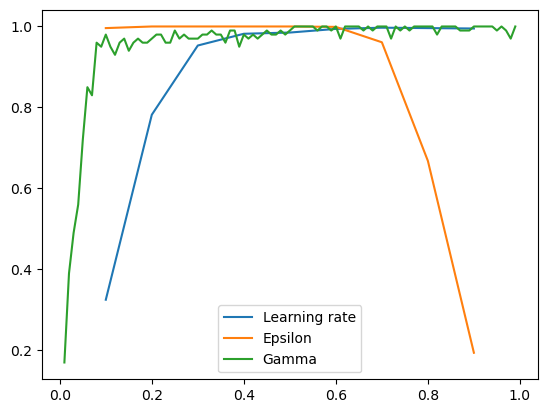

In [60]:
plt.plot([0.1*x for x in range(1, 10)], learning_rate_change_acc, label="Learning rate")
plt.plot([0.1*x for x in range(1, 10)], epsilon_change_acc, label="Epsilon")
plt.plot([0.01*x for x in range(1, 100)], gamma_change_acc, label="Gamma")
plt.legend()
plt.show()

In [78]:
train_epochs = 1000
parameters = {"learning_rate": 0.9, "gamma": 0.9, "epsilon": 0.1}
solver_best, train_rewards_2, train_results_2 = train(gymnasium.make('Taxi-v3'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters, verbose=1)

Epoch: 1/1000
Epoch 1 unsuccessful!
Epoch: 2/1000
Epoch 2 unsuccessful!
Epoch: 3/1000
Epoch 3 unsuccessful!
Epoch: 4/1000
Epoch 4 unsuccessful!
Epoch: 5/1000
Epoch 5 unsuccessful!
Epoch: 6/1000
Epoch 6 unsuccessful!
Epoch: 7/1000
Epoch 7 unsuccessful!
Epoch: 8/1000
Epoch 8 unsuccessful!
Epoch: 9/1000
Epoch 9 unsuccessful!
Epoch: 10/1000
Epoch 10 unsuccessful!
Epoch: 11/1000
Epoch 11 unsuccessful!
Epoch: 12/1000
Epoch 12 unsuccessful!
Epoch: 13/1000
Epoch 13 unsuccessful!
Epoch: 14/1000
Epoch 14 successful!
Epoch: 15/1000
Epoch 15 unsuccessful!
Epoch: 16/1000
Epoch 16 unsuccessful!
Epoch: 17/1000
Epoch 17 unsuccessful!
Epoch: 18/1000
Epoch 18 unsuccessful!
Epoch: 19/1000
Epoch 19 unsuccessful!
Epoch: 20/1000
Epoch 20 unsuccessful!
Epoch: 21/1000
Epoch 21 unsuccessful!
Epoch: 22/1000
Epoch 22 unsuccessful!
Epoch: 23/1000
Epoch 23 unsuccessful!
Epoch: 24/1000
Epoch 24 unsuccessful!
Epoch: 25/1000
Epoch 25 unsuccessful!
Epoch: 26/1000
Epoch 26 unsuccessful!
Epoch: 27/1000
Epoch 27 unsucces

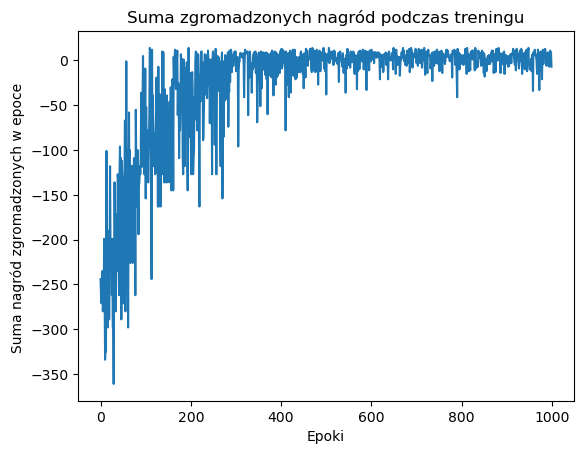

In [79]:
plt.plot([x for x in range(train_epochs)], train_rewards_2)
plt.xlabel("Epoki")
plt.ylabel("Suma nagród zgromadzonych w epoce ")
plt.title("Suma zgromadzonych nagród podczas treningu")
plt.show()

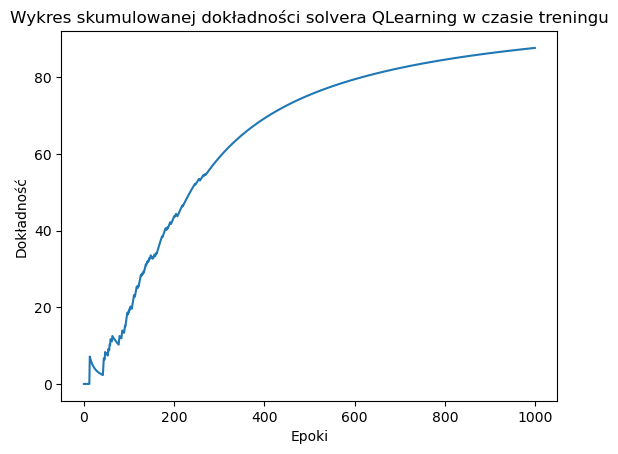

In [80]:
accumulated_accuracies = [len([train_results_2[x] for x in range(i) if train_results_2[x]])/i for i in range(1,train_epochs+1)]
accumulated_accuracies_percent = [100*x for x in accumulated_accuracies]
plt.plot([x for x in range(train_epochs)], accumulated_accuracies_percent)
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.title("Wykres skumulowanej dokładności solvera QLearning w czasie treningu")
plt.show()

In [81]:
print(f"Train accuracy: {accumulated_accuracies_percent[-1]}%")

Train accuracy: 87.7%


In [82]:
tests = 1000
test_rewards_2, test_results_2, test_accuracy_2 = test_solver(gymnasium.make('Taxi-v3'), tests, 100, verbose=1)

Test: 1/1000
Test 1 unsuccessful!
Test: 2/1000
Test 2 unsuccessful!
Test: 3/1000
Test 3 successful!
Test: 4/1000
Test 4 successful!
Test: 5/1000
Test 5 unsuccessful!
Test: 6/1000
Test 6 successful!
Test: 7/1000
Test 7 unsuccessful!
Test: 8/1000
Test 8 unsuccessful!
Test: 9/1000
Test 9 unsuccessful!
Test: 10/1000
Test 10 unsuccessful!
Test: 11/1000
Test 11 successful!
Test: 12/1000
Test 12 successful!
Test: 13/1000
Test 13 successful!
Test: 14/1000
Test 14 successful!
Test: 15/1000
Test 15 unsuccessful!
Test: 16/1000
Test 16 unsuccessful!
Test: 17/1000
Test 17 successful!
Test: 18/1000
Test 18 successful!
Test: 19/1000
Test 19 unsuccessful!
Test: 20/1000
Test 20 unsuccessful!
Test: 21/1000
Test 21 unsuccessful!
Test: 22/1000
Test 22 successful!
Test: 23/1000
Test 23 unsuccessful!
Test: 24/1000
Test 24 successful!
Test: 25/1000
Test 25 successful!
Test: 26/1000
Test 26 unsuccessful!
Test: 27/1000
Test 27 successful!
Test: 28/1000
Test 28 unsuccessful!
Test: 29/1000
Test 29 unsuccessful!


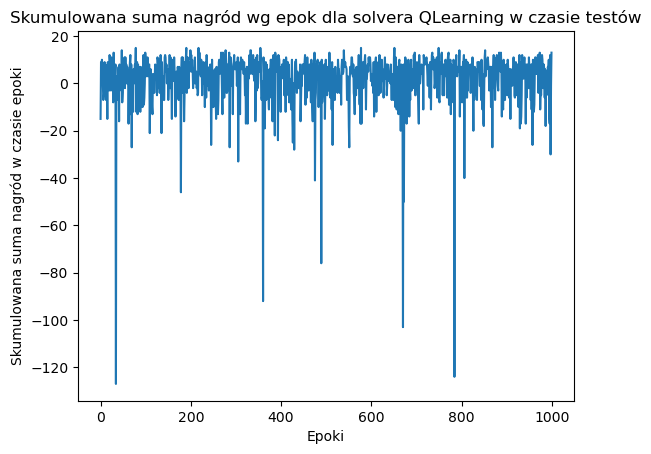

In [68]:
plt.plot([x for x in range(tests)], test_rewards_2)
plt.xlabel("Epoki")
plt.ylabel("Skumulowana suma nagród w czasie epoki")
plt.title("Skumulowana suma nagród wg epok dla solvera QLearning w czasie testów")
plt.show()

# Test QLearningSolver dla problemu Cliff Walking

In [139]:
train_epochs = 1000
parameters = {"learning_rate": 0.9, "gamma": 0.9, "epsilon": 0.1}
solver_frozen, train_rewards_frozen, train_results_frozen = train(gymnasium.make('CliffWalking-v0'), epochs=train_epochs, steps_per_epoch=100, parameters=parameters, verbose=1)

Epoch: 1/1000
Epoch 1 unsuccessful!
Epoch: 2/1000
Epoch 2 successful!
Epoch: 3/1000
Epoch 3 unsuccessful!
Epoch: 4/1000
Epoch 4 unsuccessful!
Epoch: 5/1000
Epoch 5 unsuccessful!
Epoch: 6/1000
Epoch 6 unsuccessful!
Epoch: 7/1000
Epoch 7 successful!
Epoch: 8/1000
Epoch 8 unsuccessful!
Epoch: 9/1000
Epoch 9 unsuccessful!
Epoch: 10/1000
Epoch 10 successful!
Epoch: 11/1000
Epoch 11 successful!
Epoch: 12/1000
Epoch 12 successful!
Epoch: 13/1000
Epoch 13 successful!
Epoch: 14/1000
Epoch 14 successful!
Epoch: 15/1000
Epoch 15 successful!
Epoch: 16/1000
Epoch 16 successful!
Epoch: 17/1000
Epoch 17 successful!
Epoch: 18/1000
Epoch 18 successful!
Epoch: 19/1000
Epoch 19 successful!
Epoch: 20/1000
Epoch 20 successful!
Epoch: 21/1000
Epoch 21 successful!
Epoch: 22/1000
Epoch 22 successful!
Epoch: 23/1000
Epoch 23 successful!
Epoch: 24/1000
Epoch 24 successful!
Epoch: 25/1000
Epoch 25 successful!
Epoch: 26/1000
Epoch 26 successful!
Epoch: 27/1000
Epoch 27 successful!
Epoch: 28/1000
Epoch 28 successf

In [140]:
tests = 100
rewards, results, accuracy = test_solver(gymnasium.make('CliffWalking-v0'), solver_frozen, tests, 100, verbose=1)

Test: 1/100
Test 1 successful!
Test: 2/100
Test 2 successful!
Test: 3/100
Test 3 successful!
Test: 4/100
Test 4 successful!
Test: 5/100
Test 5 successful!
Test: 6/100
Test 6 successful!
Test: 7/100
Test 7 successful!
Test: 8/100
Test 8 successful!
Test: 9/100
Test 9 successful!
Test: 10/100
Test 10 successful!
Test: 11/100
Test 11 successful!
Test: 12/100
Test 12 successful!
Test: 13/100
Test 13 successful!
Test: 14/100
Test 14 successful!
Test: 15/100
Test 15 successful!
Test: 16/100
Test 16 successful!
Test: 17/100
Test 17 successful!
Test: 18/100
Test 18 successful!
Test: 19/100
Test 19 successful!
Test: 20/100
Test 20 successful!
Test: 21/100
Test 21 successful!
Test: 22/100
Test 22 successful!
Test: 23/100
Test 23 successful!
Test: 24/100
Test 24 successful!
Test: 25/100
Test 25 successful!
Test: 26/100
Test 26 successful!
Test: 27/100
Test 27 successful!
Test: 28/100
Test 28 successful!
Test: 29/100
Test 29 successful!
Test: 30/100
Test 30 successful!
Test: 31/100
Test 31 success

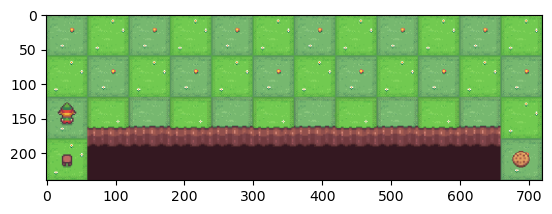

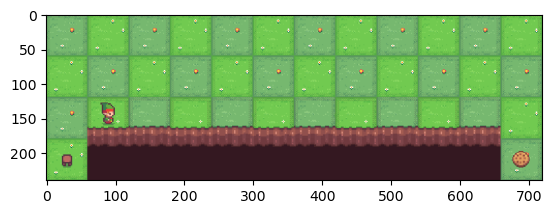

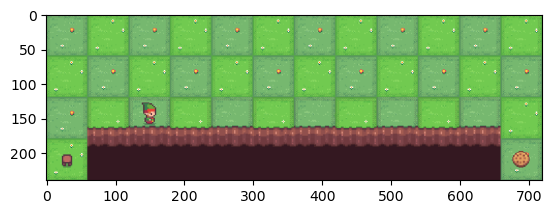

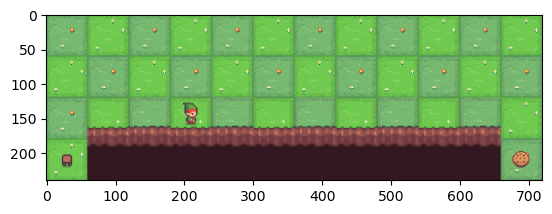

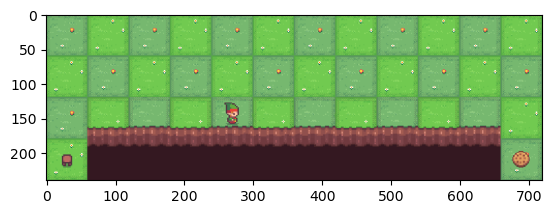

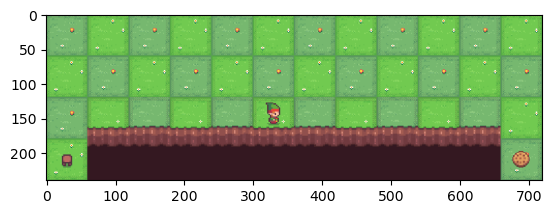

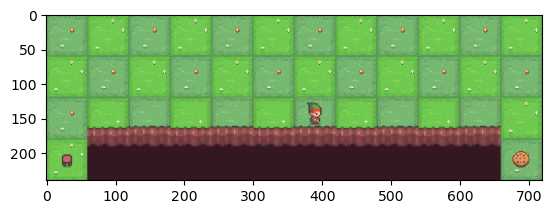

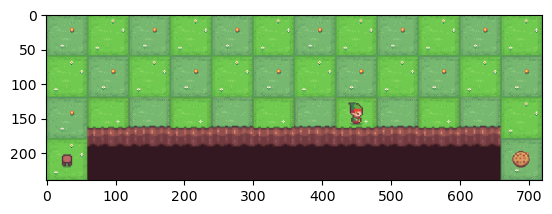

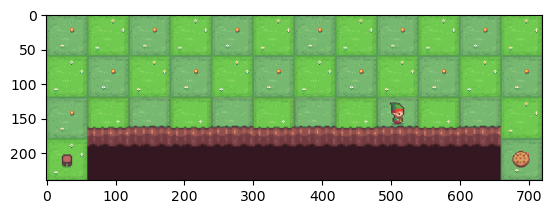

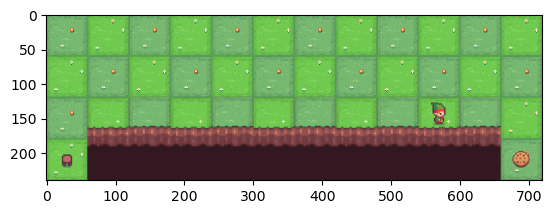

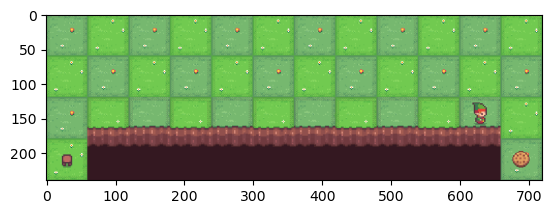

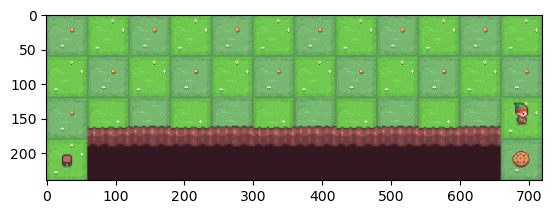

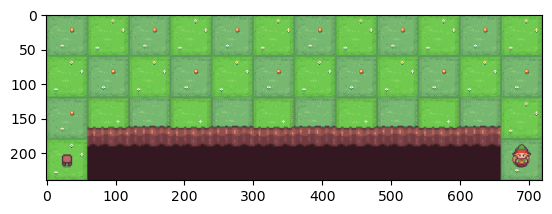

In [147]:

environment = gymnasium.make('CliffWalking-v0', render_mode="rgb_array")
state = environment.reset()[0]
epoch_accumulated_reward = 0

for test_try in range(100):
    move = solver_frozen.get_best_action(state)
    
    next_state, reward, done, info, info2 = environment.step(int(move))
    epoch_accumulated_reward += reward

    state = next_state
    
    plt.clf()
    plt.imshow(environment.render())
    plt.pause(0.01)
    
    if done:
        break

# Wnioski